In [41]:
import sys
sys.path.extend(['/home/nadzya/Apps/log-anomaly-detector/', '/home/nadzya/Apps/log-aggregator/'])

In [42]:
import pandas as pd
import numpy as np 

from anomaly_detector.storage.mongodb_storage import MongoDBDataStorageSource
from anomaly_detector.config import Configuration
from anomaly_detector.storage.storage_attribute import MGStorageAttribute
from anomaly_detector.model.w2v_model import W2VModel

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import re
import string

In [43]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [44]:
def config():
    """Initialize configurations before testing."""
    cfg = Configuration()
    cfg.MG_HOST = "172.17.18.83"
    cfg.MG_PORT = 27017
    cfg.MG_USER = 'dbadmin'
    cfg.MG_PASSWORD = 'password123'
    cfg.MG_CERT_DIR = ""
    cfg.MG_INPUT_DB = "anomalydb"
    cfg.MG_INPUT_COL = "utm_anomaly"
    cfg.HOSTNAME_INDEX = "hostname"
    cfg.DATETIME_INDEX = "timestamp"
    cfg.TRAIN_VECTOR_LENGTH = 25
    cfg.TRAIN_WINDOW = 5
    return cfg

# Visualization

## PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(vectors)

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


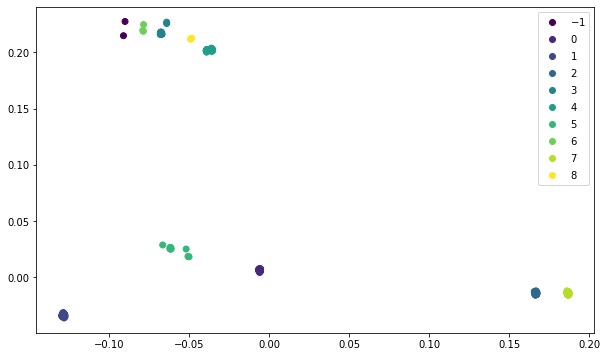

In [35]:
pylab.figure(figsize=(10, 6))
scat = pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c=list(df["cluster"]))
pylab.legend(*scat.legend_elements(num="auto"))